# ta-target-range
Purpose: creating the 'target' column by taking max - min

Flaw: Instantly turns from good to bad due to a crash happening immediately one week later

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv("../data/BTCUSDT-hour-features.csv")

Text(0, 0.5, 'USDT Price')

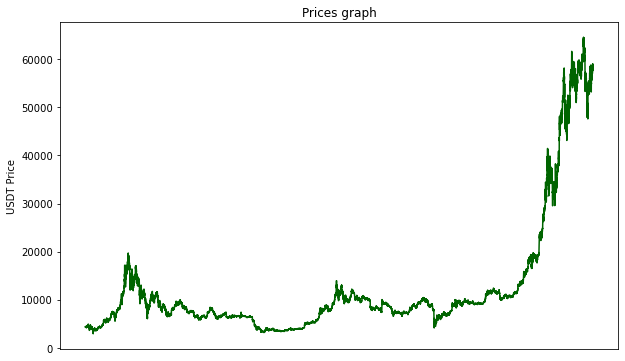

In [16]:
plt.figure(figsize=(10, 6))


plt.plot(df.timestamp,
         df.close,
            c="darkgreen")
ax = plt.gca()
ax.axes.xaxis.set_visible(False)

# Add some helpful info
plt.title("Prices graph")
plt.xlabel("Time")
plt.ylabel("USDT Price")

## Plan for target
w = next 200 hours

close - (((max(w) - min(w))/2)+min(w))

In [89]:
def get_target(span=200):
    """
    adds target to df. Target formula:
    w = next 200 hours
    close - (((max(w) - min(w))/2)+min(w))
    """
    acc = []
    df_len = len(df["close"])

    for i in range(len(df["close"])):

        if i+span < df_len:
            h = max(df["high"][i+1:i+span])
            l = min(df["low"][i+1:i+span])
            acc.append(((h-l)/2+l)-df["close"][i])
        else:
            acc.append(None)

    return acc
        
        


In [90]:
df["target"] = get_target()

Text(0, 0.5, 'USDT Price')

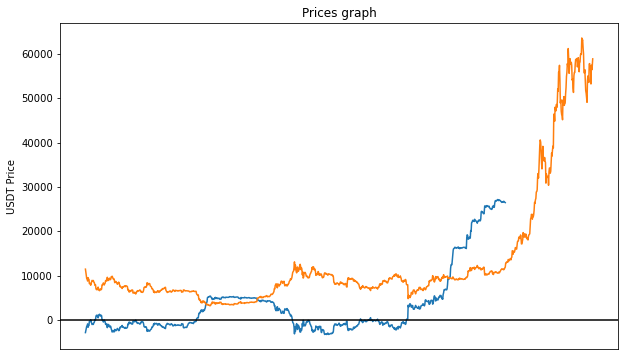

In [37]:
plt.figure(figsize=(10, 6))


plt.plot(df.timestamp,
         df.target)
plt.plot(df.timestamp,
         df.close)
plt.axhline(y=0, color='black', linestyle='-')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)


# Add some helpful info
plt.title("Prices graph")
plt.xlabel("Time")
plt.ylabel("USDT Price")

## Logging price and new formula for target
New target formula is ln(future change) / ln(close)

In [91]:
df["ln_close"] = np.log(df["close"])

In [92]:
def divide(x, y):
    """divides x and y, returns None if either are None"""
    if not isinstance(x, float) or not isinstance(y, float) or y == 0:
        return None
    else:
        return x/y

def abs_ln(x):
    """returns ln, and -ln(abs(x)) if x is negative"""
    return np.log(abs(x)) if x>0 else -np.log(abs(x))


In [93]:
a = list(map(abs_ln, df["target"]))
b = np.log(df["close"])


In [94]:
df["target_new"] = list(map(divide, a, b)) 

In [95]:
df

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,...,bb_bbh,bb_bbl,bb_bbhi,bb_bbli,bb_bbw,bb_bbp,atr,target,ln_close,target_new
0,2017-08-25 12:00:00.000,4361.27,4361.27,4261.13,4309.69,110.998609,1503665999999,4.792662e+05,1891.0,7.918988,...,4410.014255,4182.823745,0.0,0.0,5.287904,0.558414,57.330282,222.175,8.368621,0.645682
1,2017-08-25 13:00:00.000,4311.69,4345.00,4297.66,4312.00,20.801018,1503669599999,8.978516e+04,188.0,4.482264,...,4404.864512,4200.355488,0.0,0.0,4.753139,0.545915,56.616690,219.865,8.369157,0.644392
2,2017-08-25 14:00:00.000,4303.82,4340.00,4291.52,4305.00,10.610266,1503673199999,4.580427e+04,139.0,6.107378,...,4401.965291,4211.654709,0.0,0.0,4.418829,0.490489,56.035498,226.865,8.367532,0.648262
3,2017-08-25 15:00:00.000,4321.50,4422.29,4321.50,4394.36,21.796763,1503676799999,9.534934e+04,189.0,5.421801,...,4408.584109,4222.864891,0.0,0.0,4.303315,0.923411,60.410820,137.505,8.388077,0.586983
4,2017-08-25 16:00:00.000,4394.36,4453.91,4375.29,4447.31,17.784780,1503680399999,7.847508e+04,179.0,3.762923,...,4420.360065,4236.469935,1.0,0.0,4.248440,1.146555,61.711475,84.555,8.400055,0.528259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32328,2021-05-08 15:00:00,58947.47,58947.48,57472.95,57599.87,5851.539191,1620489599999,3.408746e+08,140494.0,2843.709612,...,59275.374200,56936.276800,0.0,0.0,4.025582,0.283696,701.537750,NaN,10.961276,NaN
32329,2021-05-08 16:00:00,57599.86,58500.00,57560.63,58381.14,4739.339671,1620493199999,2.753576e+08,137969.0,2172.633797,...,59296.635830,56992.332170,0.0,0.0,3.963065,0.602702,718.525768,NaN,10.974748,NaN
32330,2021-05-08 17:00:00,58381.14,59050.45,58139.91,58898.98,3815.391269,1620496799999,2.241230e+08,108370.0,1870.545827,...,59359.052653,57083.969347,0.0,0.0,3.907634,0.797778,732.241070,NaN,10.983579,NaN
32331,2021-05-08 18:00:00,58901.45,59251.04,58901.45,59060.57,2937.039406,1620500399999,1.734920e+08,105800.0,1551.876404,...,59376.610526,57269.376474,0.0,0.0,3.613042,0.850021,705.085280,NaN,10.986319,NaN


In [115]:
df_short = df[26000:27000]

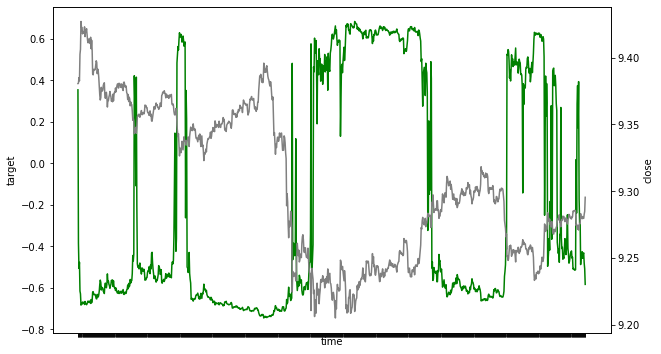

In [116]:
fig,ax = plt.subplots(figsize=(10, 6))
ax.plot(df_short.timestamp,
         df_short.target_new,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("target")

ax.tick_params(labelbottom=False)    
# ax.axes.xaxis.set_visible(False)

ax2=ax.twinx()
ax2.plot(df_short.timestamp,
         df_short.ln_close,
         color="gray")
ax2.set_ylabel("close")
plt.show()